# AIM:
    To build a model that efficiently predict the presence or absence of heart disease in angiographic patients

# DATASET INFORMATION
    This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  
    In particular, the Cleveland database is the only one that has been used by ML researchers to date.  
    The "goal" field refers to the presence of heart disease in the patient.  It is integer valued
    from 0 (no presence) to 4. 
    Experiments with the Cleveland database have concentrated on simply attempting to distinguish 
    presence (values 1,2,3,4) from absence (value 0).  
    
# DESCRIPTION OF FEATURES 
    Only 14 attributes used:
      1. age - age in years       
      2. sex - sex (1 = male; 0 = female)       
      3. cp - chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic      
      4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
      5. chol - serum cholestoral in mg/dl     
      6. fbs - (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)      
      7. restecg - resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
      8. thalach - maximum heart rate achieved
      9. exang - exercise induced angina (1 = yes; 0 = no) 
      10. oldpeak - ST depression induced by exercise relative to rest   
      11. slope - the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping    
      12. ca - number of major vessels (0-3) colored by flourosopy       
      13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect    
      14. num  - diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing  

# LOAD THE ESSENTIAL MODULES

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn

# FETCH THE DATASET

In [2]:
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
heart_disease.metadata

{'uci_id': 45,
 'name': 'Heart Disease',
 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease',
 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv',
 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 303,
 'num_features': 13,
 'feature_types': ['Categorical', 'Integer', 'Real'],
 'demographics': ['Age', 'Sex'],
 'target_col': ['num'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1989,
 'last_updated': 'Fri Nov 03 2023',
 'dataset_doi': '10.24432/C52P4X',
 'creators': ['Andras Janosi',
  'William Steinbrunn',
  'Matthias Pfisterer',
  'Robert Detrano'],
 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.',
  'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M.

In [3]:
# variable information 
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [4]:
source_data = heart_disease['metadata']['data_url']
data = pd.read_csv(source_data)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# DATA CLEANING AND EXPLORATION

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
# Percentage of Missing Values
round((data.isna().sum() / data.shape[0])*100, 2)

age         0.00
sex         0.00
cp          0.00
trestbps    0.00
chol        0.00
fbs         0.00
restecg     0.00
thalach     0.00
exang       0.00
oldpeak     0.00
slope       0.00
ca          1.32
thal        0.66
num         0.00
dtype: float64

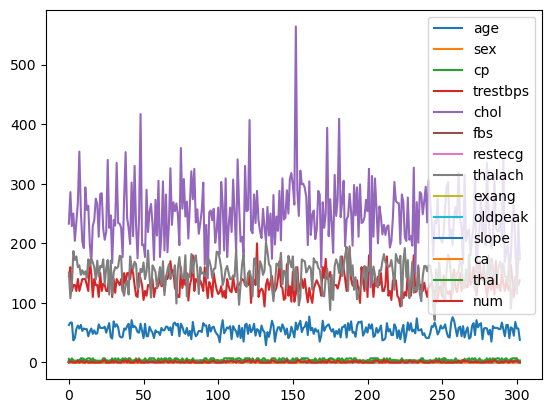

In [8]:
data.plot();

In [9]:
misssing_proportion = (data['ca'].isnull().sum() / data['ca'].size) * 100
print("The percentage of mssing values in column 'ca': ", round(misssing_proportion, 2))

The percentage of mssing values in column 'ca':  1.32


The feature 'ca' provides information of the number of major vesels (0-3) colored by flourosopy, the proportion of missing values in this column is only 1.32% (<2.0%). Since this feature is a of discrete numerical type hence, the missing values are filled with the mode value in order to have enough data for modelling. 

In [10]:
data.loc[:, 'ca'] = data['ca'].fillna(data['ca'].mode()[0])
print(data['ca'].mode()[0])

0.0


In [11]:
missing_thal_prop = (data['thal'].isnull().sum() / data['thal'].size) * 100
print("The percentage of missing values in feature 'thal' is: ", round(missing_thal_prop, 2))

The percentage of missing values in feature 'thal' is:  0.66


Also, the proportion of mssing values in feature 'thal' is <1.0%, and considering the categorical nature of this feature, 
the mssing values are filled with the modal value.

In [12]:
data.loc[:, 'thal'] = data['thal'].fillna(data['thal'].mode()[0])
print("The modal value in feature 'thal' is: ", X['thal'].mode()[0])

The modal value in feature 'thal' is:  3.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [14]:
cleaned_data = data.copy()
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [15]:
# Data with the binarized target
binarized_data = cleaned_data.copy()
binarized_data['num category'] = binarized_data['num'].replace([1, 2, 3, 4], 1)
binarized_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num category
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


# VISUALIZING THE DATA

## Target Variable Distribution ## 

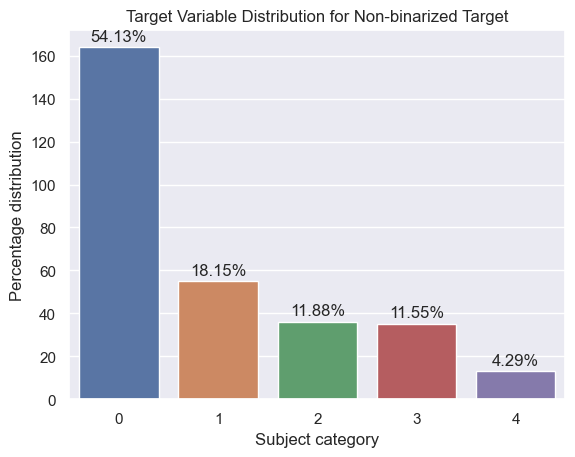

In [16]:
num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal', 'num category']
%matplotlib inline
sns.set(style='ticks', color_codes=True)
sns.set(style='darkgrid')

total = len(binarized_data)
ax = sns.countplot(data=cleaned_data, x='num')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format((height/total) * 100),
            ha="center")
plt.title('Target Variable Distribution for Non-binarized Target')
plt.xlabel('Subject category')
plt.ylabel('Percentage distribution')

plt.show();

Rectangle(xy=(-0.4, 0), width=0.8, height=164, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=139, angle=0)


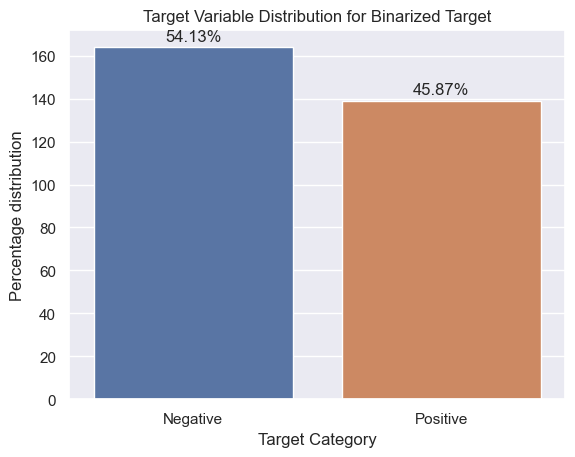

In [17]:
#For binarized data
ax = sns.countplot(data=binarized_data, x='num category')
ax.set_xticklabels(['Negative', 'Positive'])

# Calculate percentage proportions
total = len(binarized_data)
for p in ax.patches:
    print(p)
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format((height/total) * 100),
            ha="center")

plt.title('Target Variable Distribution for Binarized Target')
plt.xlabel("Target Category")
plt.ylabel('Percentage distribution')
plt.show();

# Finding Relation Between Numerical variables

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


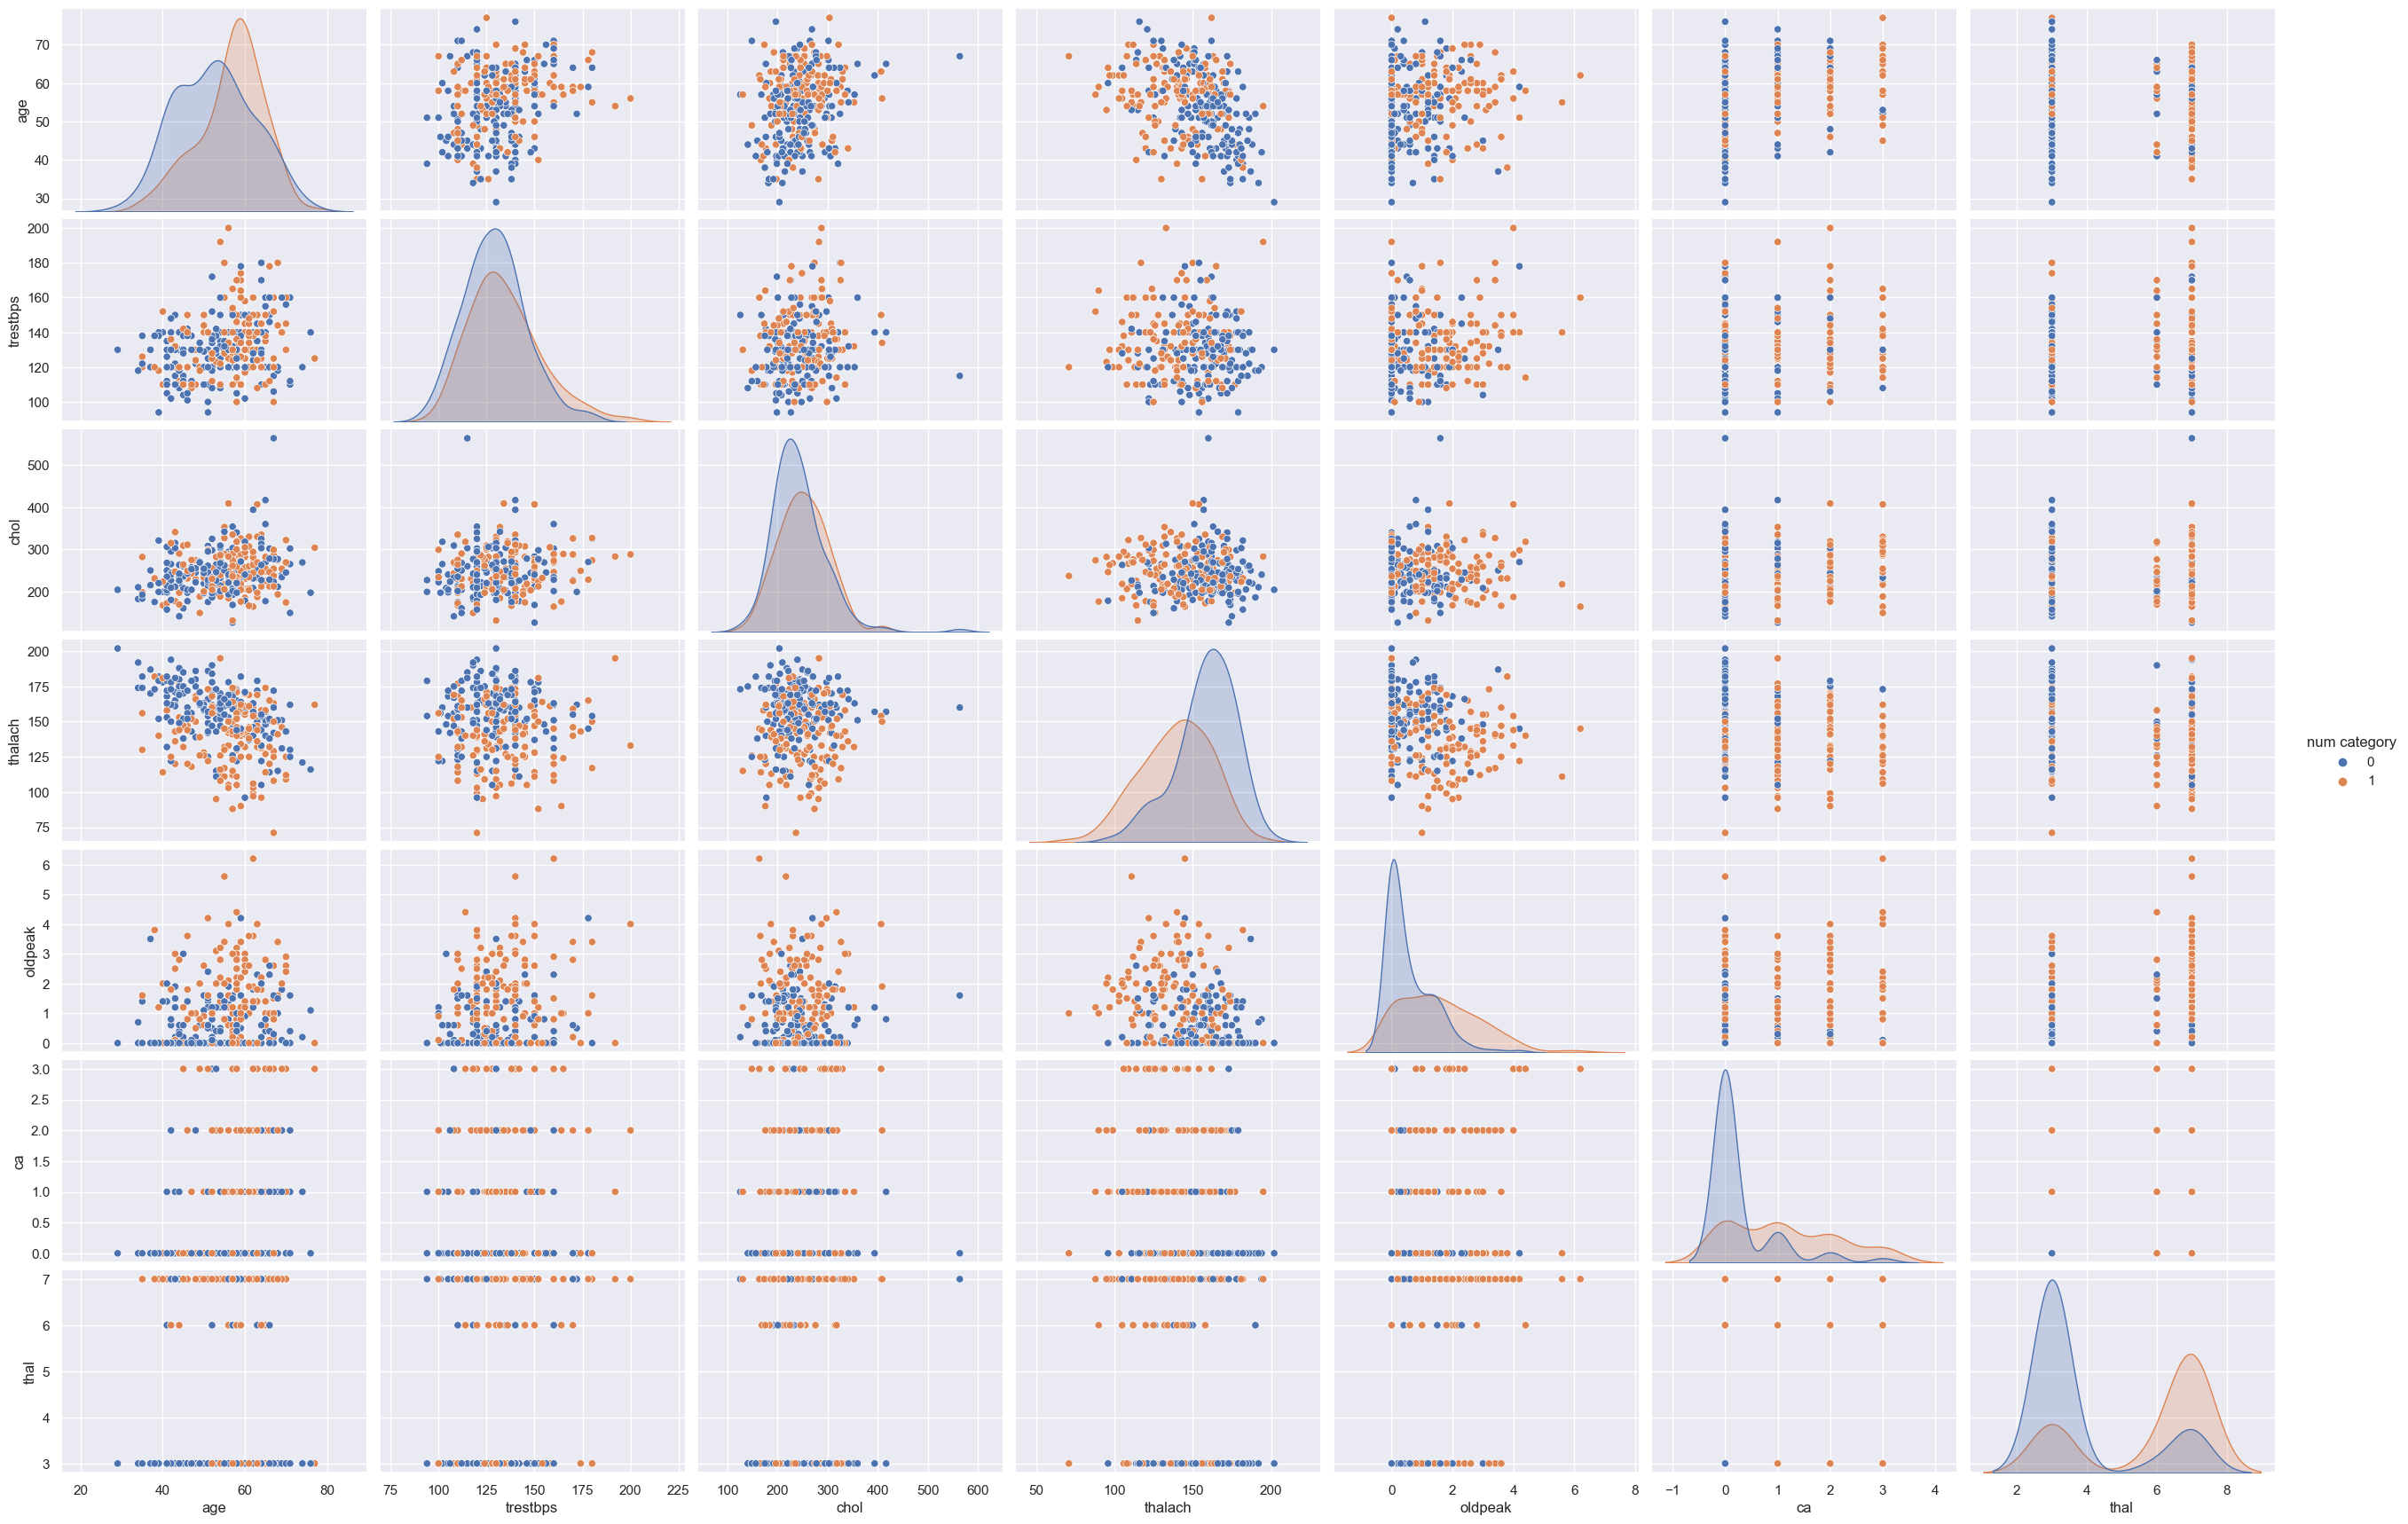

In [18]:
sns.pairplot(data=binarized_data[num_col], hue='num category', aspect=1.5)

# Correlation Matrix

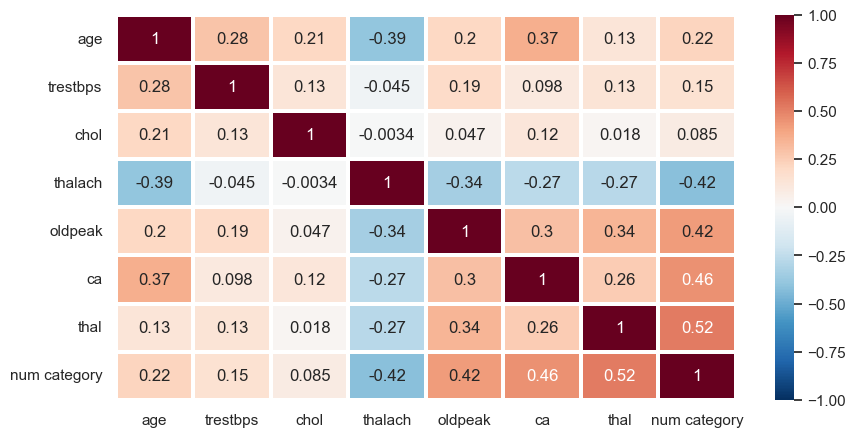

In [19]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(binarized_data[num_col].corr(), cmap='RdBu_r', linewidths=1.5, annot=True, vmin=-1, vmax=1)
plt.show();

In [20]:
corr = binarized_data[num_col].corr()
corr['num category'].sort_values(ascending=False)

num category    1.000000
thal            0.522057
ca              0.460033
oldpeak         0.424510
age             0.223120
trestbps        0.150825
chol            0.085164
thalach        -0.417167
Name: num category, dtype: float64

# Distribution of Demographic Variables

In [21]:
def plot_countplot(data, x, hue, ax, title, hue_labels=None):
    sns.countplot(data=data, x=x, hue=hue, ax=ax, linewidth=0.3, alpha=0.7, saturation=0.8, dodge=True)
    ax.set_title(title)
    if hue_labels:
        ax.legend(title=hue, labels=hue_labels, loc='best')
    total = len(data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 3, '{:.2f}%'.format((height/total) * 100), ha="center")
    return ax

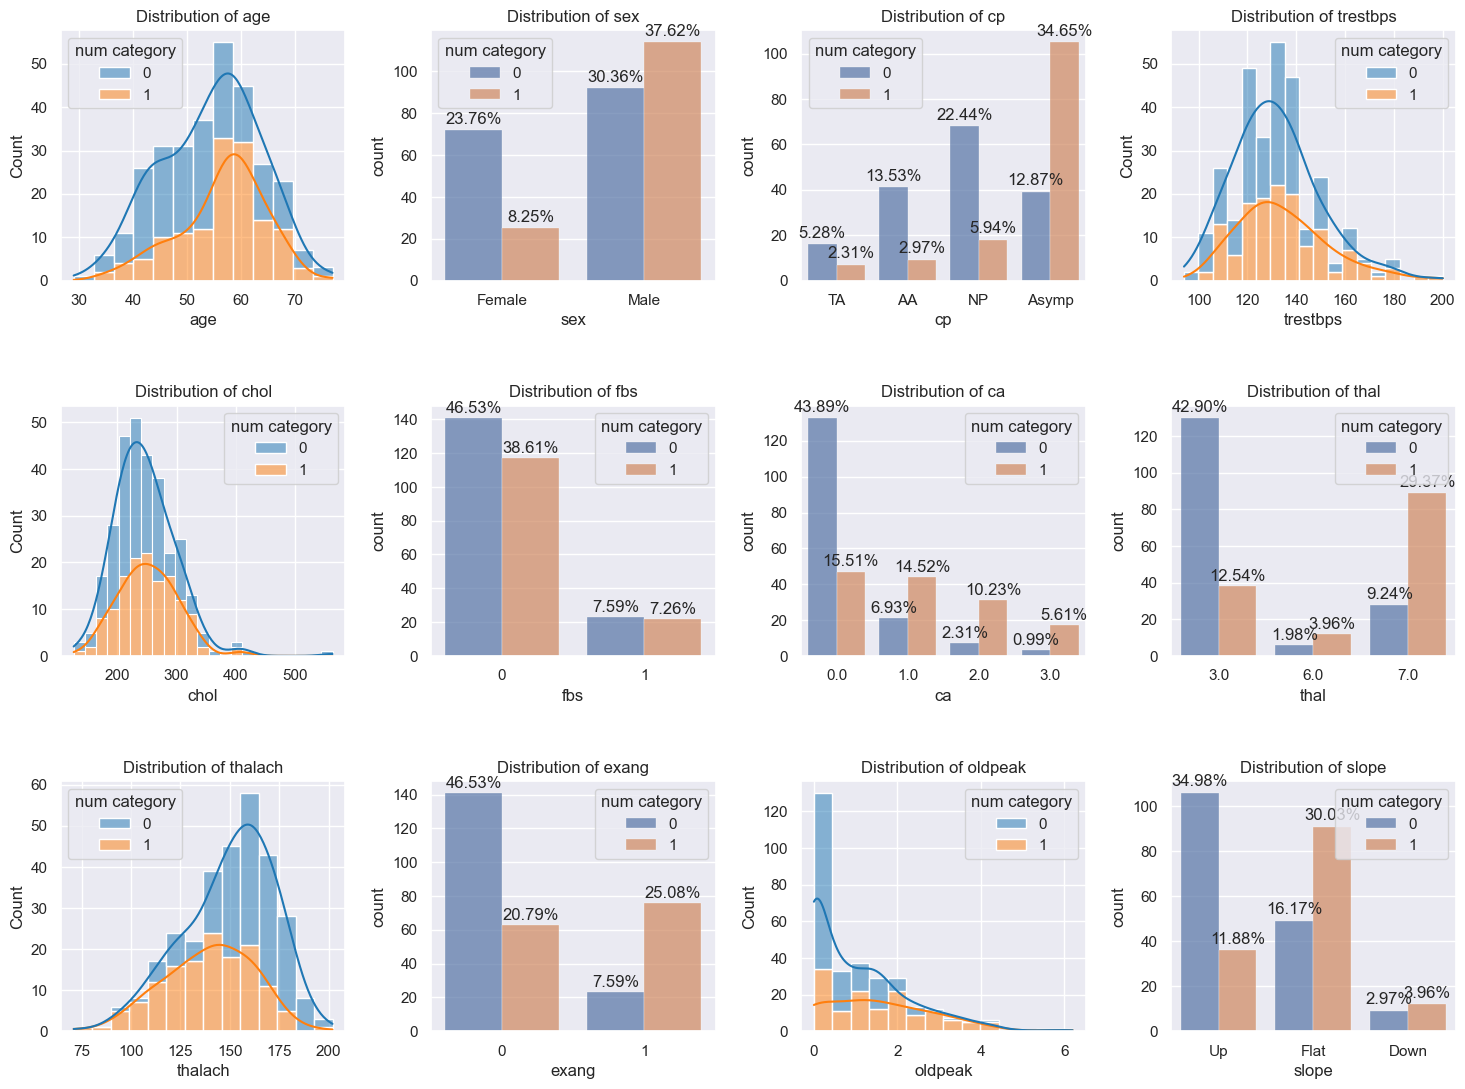

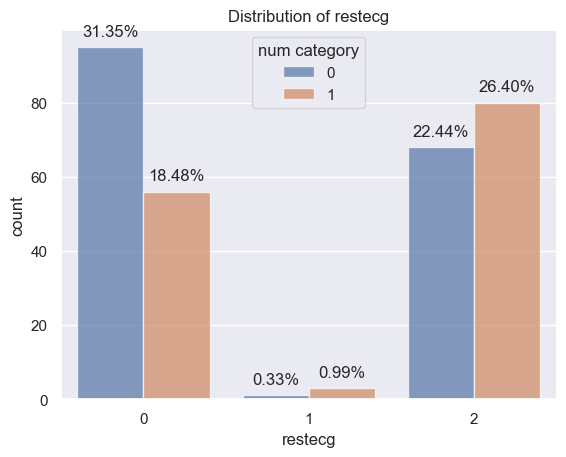

In [22]:
fig, ax = plt.subplots(3, 4, figsize=(18, 13))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

sns.histplot(data=binarized_data, x='age', hue='num category', multiple='stack', palette='tab10', kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of age')

plot_countplot(binarized_data, x='sex', hue='num category', ax=ax[0, 1], title='Distribution of sex')
ax[0, 1].set_xticklabels(['Female', 'Male'])

plot_countplot(binarized_data, x='cp', hue='num category', ax=ax[0, 2], title='Distribution of cp')
ax[0, 2].set_xticklabels(['TA', 'AA', 'NP', 'Asymp'])

sns.histplot(binarized_data, x='trestbps', hue='num category', multiple='stack', palette='tab10', kde=True, ax=ax[0, 3], legend=True)
ax[0, 3].set_title('Distribution of trestbps')

sns.histplot(binarized_data, x='chol', hue='num category', multiple='stack', palette='tab10', kde=True, ax=ax[1, 0], legend=True)
ax[1, 0].set_title('Distribution of chol')

plot_countplot(binarized_data, x='fbs', hue='num category', ax=ax[1, 1], title='Distribution of fbs')

plot_countplot(binarized_data, x='ca', hue='num category', ax=ax[1, 2], title='Distribution of ca')

sns.histplot(binarized_data, x='thalach', hue='num category', multiple='stack', palette='tab10', kde=True, ax=ax[2, 0], legend=True)
ax[2, 0].set_title('Distribution of thalach')

plot_countplot(binarized_data, x='exang', hue='num category', ax=ax[2, 1], title='Distribution of exang')

sns.histplot(binarized_data, x='oldpeak', hue='num category', multiple='stack', palette='tab10', kde=True, ax=ax[2, 2], legend=True)
ax[2, 2].set_title('Distribution of oldpeak')


plot_countplot(binarized_data, x='slope', hue='num category', ax=ax[2, 3], title='Distribution of slope')
ax[2, 3].set_xticklabels(['Up', 'Flat', 'Down'])

plot_countplot(binarized_data, x='thal', hue='num category', ax=ax[1, 3], title='Distribution of thal')

plt.figure()
plot = sns.countplot(data=binarized_data, x='restecg', hue='num category', alpha=0.7, saturation=0.8)
total = len(binarized_data)
for p in plot.patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 3, '{:.2f}%'.format((height / total) * 100), ha="center")
plt.title('Distribution of restecg')
plt.show();

# BUILDING A CLASSIFIER

# Data Preparation

Before diving into model building, it's crucial to frame the problem accurately. This involves understanding whether it falls under supervised, unsupervised, or Reinforcement Learning paradigms. Additionally, identifying whether it's a classification task, regression task, or something else is essential.

In our case, through exploratory data analysis (EDA), we've observed that our dataset contains labeled target variables. Each instance comes with an expected output, specifically, the risk label of heart disease. This indicates that our problem is supervised, as we have labeled data to train our model.

Furthermore, since we're tasked with predicting a class (risk label), this problem fits into the classification category. Moreover, since the target variable has only two possible outcomes (present or absent), it's specifically a binary classification task.

This framing of the problem guides us in selecting appropriate modeling techniques and evaluating their performance effectively.

In [23]:
#The Data we'll be working on
ml_data = binarized_data.copy()
ml_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num category
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1


In [24]:
#Preparing the data for ML
sex_category =['Male', 'Female'] 
cp_category = ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
fbs_category = ['False', 'True']
exang_category = ['No', 'Yes']
slope_category = ['Upsloping', 'Flat', 'Downsloping']
thal_category =['Normal', 'Fixed defect', 'Reversable defect']
restecg_category =['Normal', 'ST-T wave abnormality', 'Left Ventricular Hypertrophy']

ml_data['sex'] = ml_data['sex'].replace([1, 0], sex_category)
ml_data['cp'] = ml_data['cp'].replace([1, 2, 3, 4], cp_category)
ml_data['fbs'] = ml_data['fbs'].replace([0, 1], fbs_category)
ml_data['exang'] = ml_data['exang'].replace([0, 1], exang_category)
ml_data['slope'] = ml_data['slope'].replace([1, 2, 3], slope_category)
ml_data['thal'] = ml_data['thal'].replace([3, 6, 7], thal_category)
ml_data['restecg'] = ml_data['restecg'].replace([0, 1, 2], restecg_category)

In [25]:
# ml_data.drop(columns=['num'], inplace=True)
ml_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,num category
0,63,Male,Typical angina,145,233,True,Left Ventricular Hypertrophy,150,No,2.3,Downsloping,0.0,Fixed defect,0,0
1,67,Male,Asymptomatic,160,286,False,Left Ventricular Hypertrophy,108,Yes,1.5,Flat,3.0,Normal,2,1
2,67,Male,Asymptomatic,120,229,False,Left Ventricular Hypertrophy,129,Yes,2.6,Flat,2.0,Reversable defect,1,1
3,37,Male,Non-anginal pain,130,250,False,Normal,187,No,3.5,Downsloping,0.0,Normal,0,0
4,41,Female,Atypical angina,130,204,False,Left Ventricular Hypertrophy,172,No,1.4,Upsloping,0.0,Normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,Typical angina,110,264,False,Normal,132,No,1.2,Flat,0.0,Reversable defect,1,1
299,68,Male,Asymptomatic,144,193,True,Normal,141,No,3.4,Flat,2.0,Reversable defect,2,1
300,57,Male,Asymptomatic,130,131,False,Normal,115,Yes,1.2,Flat,1.0,Reversable defect,3,1
301,57,Female,Atypical angina,130,236,False,Left Ventricular Hypertrophy,174,No,0.0,Flat,1.0,Normal,1,1


In [26]:
features = ml_data.drop(columns=['num category'])
target = ml_data['num category']

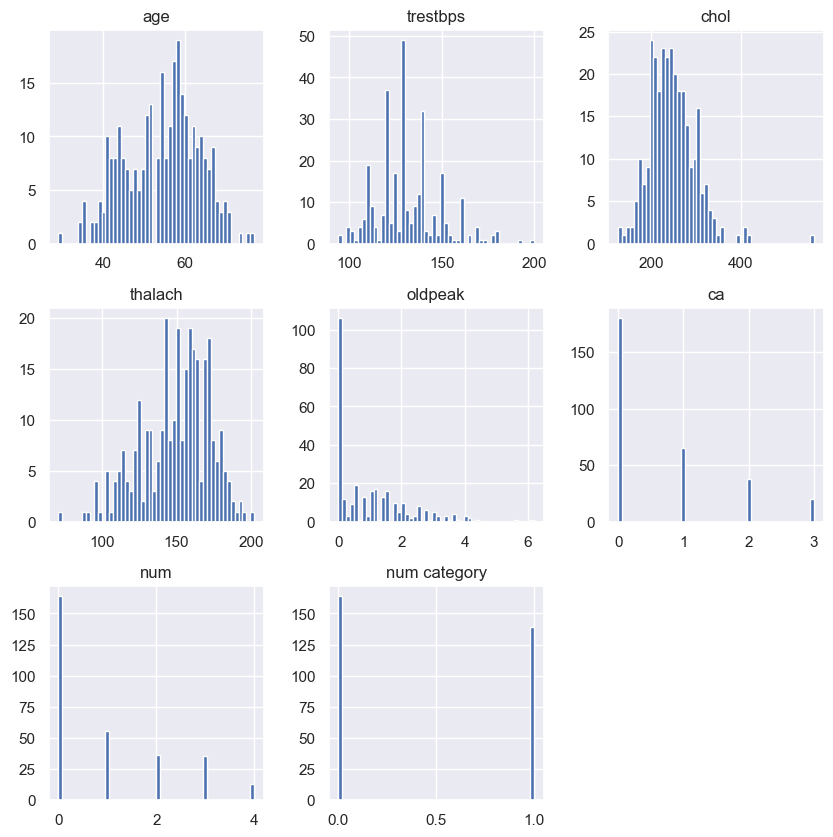

In [27]:
# plt.figure(figsize=(10, 10))
ml_data.hist(bins=50, figsize=(10, 10))
plt.show();

# Feature Engineering
Other than Handling missing values, Transformation of target labels, Creation of new features which have already been handled, the only process here remaining is Removal of Outliers

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
num_attribs = ['age', 'trestbps', 'chol', 'thalach', 'ca', 'oldpeak']
cat_attribs = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

full_pipeline = ColumnTransformer([("num", StandardScaler(), num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)])
data_prepared = full_pipeline.fit_transform(features)
data_prepared.shape

(303, 25)

<Axes: >

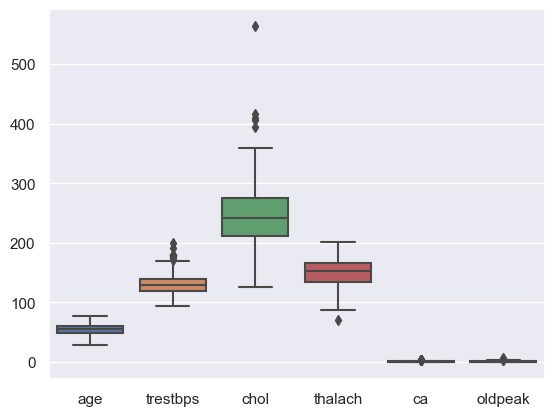

In [29]:
sns.boxplot(data=ml_data[num_attribs])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_prepared, target, train_size=0.8, random_state=42)

# Model Selection

In [31]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
    
    #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)

    #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    #Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    #Using SVC method of svm class to use Kernel SVM Algorithm
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #print model accuracy on the training data.
    print('[1]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[2]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[3]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
    print('[4]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
    print('[5]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[6]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[7]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [32]:
model = models(x_train, y_train)

[1]Logistic Regression Training Accuracy: 0.8677685950413223
[2]K Nearest Neighbor Training Accuracy: 0.8801652892561983
[3]Support Vector Machine (Linear Classifier) Training Accuracy: 0.8677685950413223
[4]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9008264462809917
[5]Gaussian Naive Bayes Training Accuracy: 0.8223140495867769
[6]Decision Tree Classifier Training Accuracy: 1.0
[7]Random Forest Classifier Training Accuracy: 0.9958677685950413


In [33]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(y_train, model[i].predict(x_train)) 
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_train, model[i].predict(x_train)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i+1,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[123  12]
 [ 20  87]]
Model[1] Testing Accuracy = "0.8677685950413223 !"

[[121  14]
 [ 15  92]]
Model[2] Testing Accuracy = "0.8801652892561983 !"

[[123  12]
 [ 20  87]]
Model[3] Testing Accuracy = "0.8677685950413223 !"

[[130   5]
 [ 19  88]]
Model[4] Testing Accuracy = "0.9008264462809917 !"

[[112  23]
 [ 20  87]]
Model[5] Testing Accuracy = "0.8223140495867769 !"

[[135   0]
 [  0 107]]
Model[6] Testing Accuracy = "1.0 !"

[[134   1]
 [  0 107]]
Model[7] Testing Accuracy = "0.9958677685950413 !"



In [34]:
from sklearn.metrics import classification_report
for i in range(len(model)):
    predictions = model[i].predict(x_train)
    report = classification_report(y_train, predictions)
    print(f"Classification Report for Model {i+1}:\n{report}\n")

Classification Report for Model 1:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       135
           1       0.88      0.81      0.84       107

    accuracy                           0.87       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.87      0.87       242


Classification Report for Model 2:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       135
           1       0.87      0.86      0.86       107

    accuracy                           0.88       242
   macro avg       0.88      0.88      0.88       242
weighted avg       0.88      0.88      0.88       242


Classification Report for Model 3:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       135
           1       0.88      0.81      0.84       107

    accuracy                           0.87       242
   macro avg       0.

# Create an Ensemble Classifier from weak performing classifiers

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(random_state = 0)
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
svc_lin = SVC(kernel = 'linear', random_state = 0)
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
gauss_clf = GaussianNB()

voting_clf = VotingClassifier(estimators=[('lr', log_clf),
                                         ('knn_c', knn_clf),
                                         ('svc_l', svc_lin),
                                         ('svc_r', svc_rbf),
                                         ('gc', gauss_clf)],
                             voting='hard')
voting_clf.fit(x_train, y_train)
y_predicted = voting_clf.predict(x_train)
report = classification_report(y_train, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       135
           1       0.91      0.83      0.87       107

    accuracy                           0.89       242
   macro avg       0.89      0.88      0.89       242
weighted avg       0.89      0.89      0.89       242



Only SVM (rbf) outperforms the Voting Classifier

# SELECTING THE BEST MODEL AND THE CORRESPONDING HYPERPARAMETER

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the pipeline with the default classifier as RandomForestClassifier
pipe = Pipeline([("classifier", RandomForestClassifier())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
    {
        "classifier": [SVC(kernel='rbf', probability=True)],  
        "classifier__C": np.logspace(0, 4, 10),
        "classifier__gamma": ['scale', 'auto']
    }, 
    {
        "classifier": [RandomForestClassifier()],
        "classifier__n_estimators": [10, 100, 1000],
        "classifier__max_features": [1, 2, 3]
    },
    {
        "classifier": [DecisionTreeClassifier()],
        "classifier__max_depth": np.arange(2, 200),
        "classifier__max_leaf_nodes": np.arange(2, 20)
    }
]

# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0, n_jobs=-1, error_score='raise')

# Fit grid search
grid_search = gridsearch.fit(x_train, y_train)

In [37]:
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('classifier', SVC(gamma='auto', probability=True))])

In [38]:
best_model.get_params()

{'memory': None,
 'steps': [('classifier', SVC(gamma='auto', probability=True))],
 'verbose': False,
 'classifier': SVC(gamma='auto', probability=True),
 'classifier__C': 1.0,
 'classifier__break_ties': False,
 'classifier__cache_size': 200,
 'classifier__class_weight': None,
 'classifier__coef0': 0.0,
 'classifier__decision_function_shape': 'ovr',
 'classifier__degree': 3,
 'classifier__gamma': 'auto',
 'classifier__kernel': 'rbf',
 'classifier__max_iter': -1,
 'classifier__probability': True,
 'classifier__random_state': None,
 'classifier__shrinking': True,
 'classifier__tol': 0.001,
 'classifier__verbose': False}

# Build the Final Model and Evaluate on Test

In [39]:
final_model = best_model
predictions = final_model.predict(x_test)
model_report = classification_report(y_test, predictions)
print(model_report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



# Final Model ROC-Curve

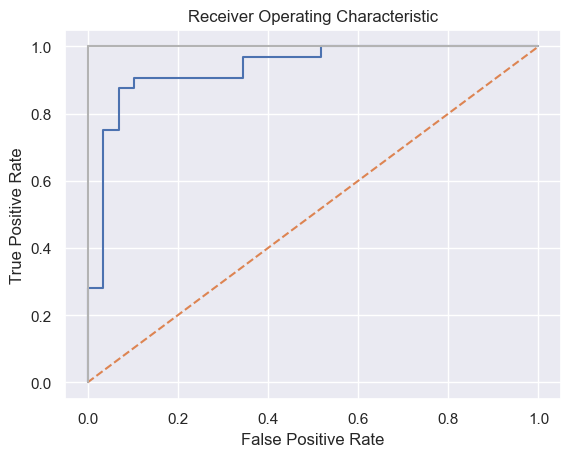

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

target_probabilities = final_model.predict_proba(x_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, target_probabilities)

# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate");
plt.show()

In [41]:
roc_auc_score(y_test, target_probabilities)

0.9342672413793103

# Thanks for Reading...

Feel free to use the comment box should you have any observation or recommendation